<a href="https://colab.research.google.com/github/Gauravsaha-97/LogisticRegression/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pData = pd.read_csv("pima-indians-diabetes.csv")
pData.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pData.shape

(768, 9)

In [6]:
pData.isnull().any()

Preg     False
Plas     False
Pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [7]:
x = pData.iloc[:, 0:-1]
x

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


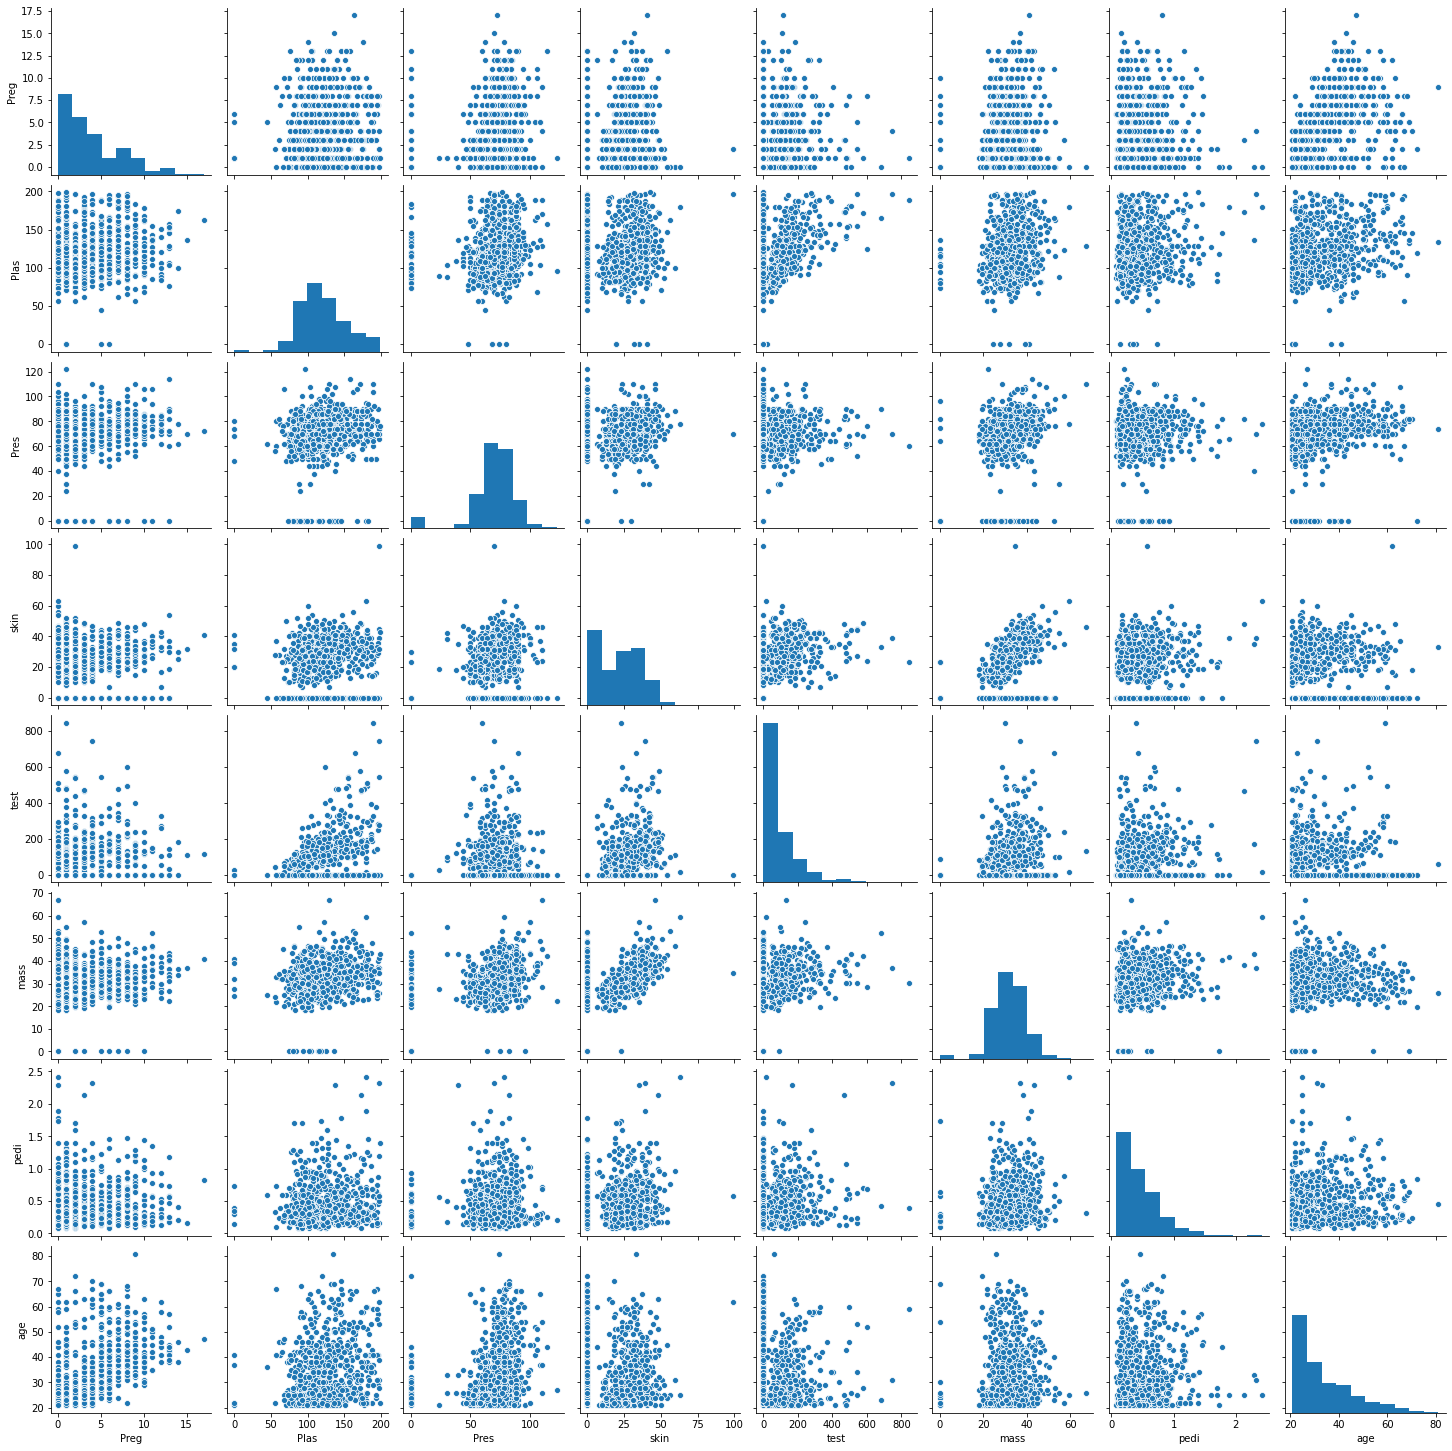

In [9]:
sns.pairplot(x, diag_kind='hist')
plt.show()

In [10]:
columns = list(pData)[0:-1]
columns

['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']

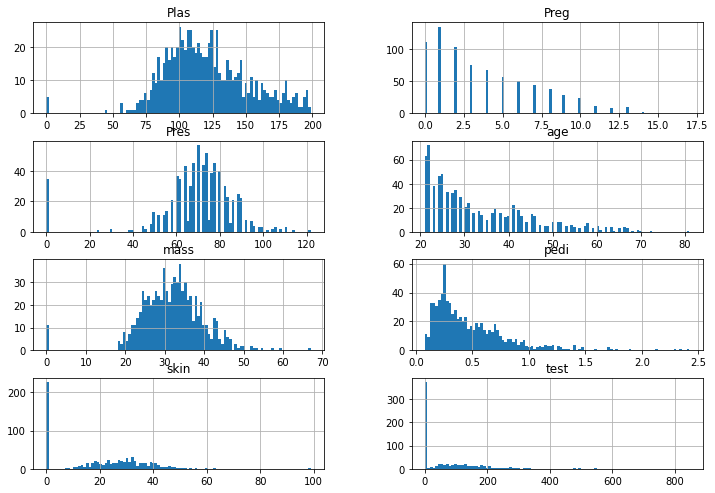

In [13]:
pData[columns].hist(bins = 100, stacked = True, figsize=(12,30), layout=(14,2))
plt.show()

In [14]:
pData.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
n_true = len(pData[pData['class']==True])
n_false = len(pData[pData['class']==False])
print("Total percentage of diabetes patients is {:.2f} %".format(n_true/(n_true+n_false)*100))
print("Total percentage of non-diabetes patients is {:.2f} %".format(n_false/(n_true+n_false)*100))

Total percentage of diabetes patients is 34.90 %
Total percentage of non-diabetes patients is 65.10 %


In [21]:
from sklearn.model_selection import train_test_split
X = pData.drop('class', axis = 1)
Y = pData['class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 1)
X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [23]:
# Replace all 0s with mean
from sklearn.impute import SimpleImputer
replace_0 = SimpleImputer(missing_values = 0, strategy = 'mean')
cols = X_train.columns
X_train = pd.DataFrame(replace_0.fit_transform(X_train))
X_test = pd.DataFrame(replace_0.fit_transform(X_test))
X_train.columns = cols
X_test.columns = cols

X_train.head()

,0,1,2,3,4,5,6,7
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [27]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
regressionModel =  LogisticRegression(solver = 'liblinear')
regressionModel.fit(X_train, Y_train)

Y_pred = regressionModel.predict(X_test)
coefficient = pd.DataFrame(regressionModel.coef_)
coefficient['Intercept'] = regressionModel.intercept_
print(coefficient)


          0         1         2  ...         6         7  Intercept
0  0.124471  0.026317 -0.029422  ...  0.346933  0.012689  -4.974766

[1 rows x 9 columns]


In [31]:
# Confusion Matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred, labels=['1','0'])
cm_data = pd.DataFrame(confusion_matrix, index=[rows for rows in [1,0]], columns=[columns for columns in ['Pred_1','Pred_0']])
cm_data

,Pred_1,Pred_0
1,48,37
0,14,132


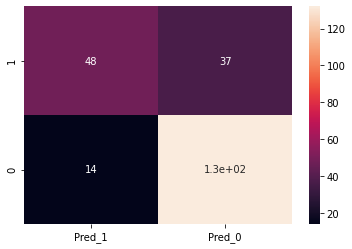

In [32]:
sns.heatmap(cm_data, annot = True)
plt.show()